# Predict new images

In [7]:
import warnings

warnings.filterwarnings('ignore')

Load class labels

In [55]:
import json

with open('models/class_indeces.json', 'r') as json_file:
    categories = json.load(json_file)

Load trained model info

In [56]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('models/cnn.h5')

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Create helper functions

In [57]:
from matplotlib import pyplot as plt

def reshape_image(image):
    temp = cv2.resize(image, (64, 64))
    return np.reshape(temp, [1, 64, 64, 3])

def get_predicted_class(model, image, categories):
    [[predicted_class]] = model.predict_classes(image)
    return f'{categories[str(predicted_class)]}'
    
def plot_prediction(image, title):
    plt.imshow(image[:,:,::-1])
    plt.title(title)
    plt.axis('off')
    plt.show()

def make_prediction(directory, model, categories):
    image = cv2.imread(directory)
    image_shaped = reshape_image(image)
    
    title = get_predicted_class(model, image_shaped, categories)
    
    plot_prediction(image, title)

Make predictions for new files

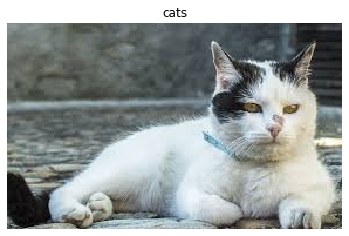

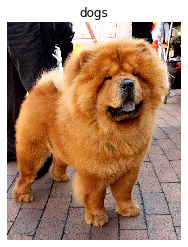

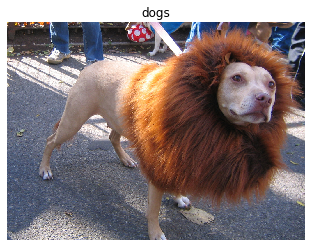

In [58]:
files = ['cat', 'dog', 'dog_lion']
for name in files:
    make_prediction(f'real_data/{name}.jpg', model, categories)